In [46]:
pip install yfinance pandas numpy matplotlib statsmodels tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [48]:
# Fetch stock data for a specific ticker
ticker = "AAPL"
start_date = "1999-01-01"
end_date = "2024-11-13"

data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']]
data.dropna(inplace=True)
data.head()


[*********************100%%**********************]  1 of 1 completed
C:\Users\Dell\AppData\Local\Temp\ipykernel_24796\2996182761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,Close
Date,
1999-01-04,0.368304
1999-01-05,0.386719
1999-01-06,0.372768
1999-01-07,0.401786
1999-01-08,0.401786


In [49]:
# Separate data for training and 2023-forecast visualization
train_data = data[data.index < '2023-01-01']
test_data = data[data.index >= '2023-01-01']


In [50]:
# Add moving averages and other indicators
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data.dropna(inplace=True)
data.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_24796\605833454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_20'] = data['Close'].rolling(window=20).mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_24796\605833454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_50'] = data['Close'].rolling(window=50).mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_24796\605833454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Close,SMA_20,SMA_50,EMA_12,EMA_26
Date,,,,,
1999-03-16,0.316964,0.313142,0.343460,0.306301,0.318078
1999-03-17,0.304129,0.311830,0.342176,0.305967,0.317045
1999-03-18,0.316964,0.311607,0.340781,0.307659,0.317039
1999-03-19,0.299107,0.309961,0.339308,0.306343,0.315710
1999-03-22,0.313058,0.308454,0.337534,0.307376,0.315514


In [51]:
# Train ARIMA model
arima_model = ARIMA(data['Close'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Predict the next day's price
next_day_arima = arima_model_fit.forecast(steps=1).iloc[0] if isinstance(arima_model_fit.forecast(steps=1), pd.Series) else arima_model_fit.forecast(steps=1)[0]
print(f"ARIMA Prediction for next day: {next_day_arima}")


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

ARIMA Prediction for next day: 224.35091747451662


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  re

In [52]:
# Scale and prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Sequence length for LSTM
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [53]:
# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=25))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X, y, batch_size=1, epochs=10)


Epoch 1/10


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6399/6399 ━━━━━━━━━━━━━━━━━━━━ 79s 12ms/step - loss: 0.0016
Epoch 2/10
6399/6399 ━━━━━━━━━━━━━━━━━━━━ 75s 12ms/step - loss: 2.5562e-04
Epoch 3/10
6399/6399 ━━━━━━━━━━━━━━━━━━━━ 76s 12ms/step - loss: 1.7975e-04
Epoch 4/10
6399/6399 ━━━━━━━━━━━━━━━━━━━━ 77s 12ms/step - loss: 1.6305e-04
Epoch 5/10
6399/6399 ━━━━━━━━━━━━━━━━━━━━ 73s 11ms/step - loss: 1.2889e-04
Epoch 6/10
6399/6399 ━━━━━━━━━━━━━━━━━━━━ 100s 16ms/step - loss: 1.4459e-04
Epoch 7/10
6399/6399 ━━━━━━━━━━━━━━━━━━━━ 169s 26ms/step - loss: 1.0218e-04
Epoch 8/10
6399/6399 ━━━━━━━━━━━━━━━━━━━━ 176s 28ms/step - loss: 9.8614e-05
Epoch 9/10
6399/6399 ━━━━━━━━━━━━━━━━━━━━ 168s 26ms/step - loss: 9.3600e-05
Epoch 10/10
6399/6399 ━━━━━━━━━━━━━━━━━━━━ 174s 27ms/step - loss: 8.6125e-05


In [54]:
# Prepare data for next 10-day prediction
last_sequence = scaled_data[-sequence_length:]
last_sequence = np.reshape(last_sequence, (1, sequence_length, 1))

predictions = []
for _ in range(20):
    predicted_price = lstm_model.predict(last_sequence)[0]
    predictions.append(predicted_price)
    last_sequence = np.append(last_sequence[:, 1:, :], [[predicted_price]], axis=1)

# Scale predictions back to original range
predictions = scaler.inverse_transform(predictions).flatten()
mean_price_10_days = predictions.mean()
print(f"Mean price for next 10 days (LSTM): {mean_price_10_days}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Mean price for next 10 days (LSTM): 227.61860886157237


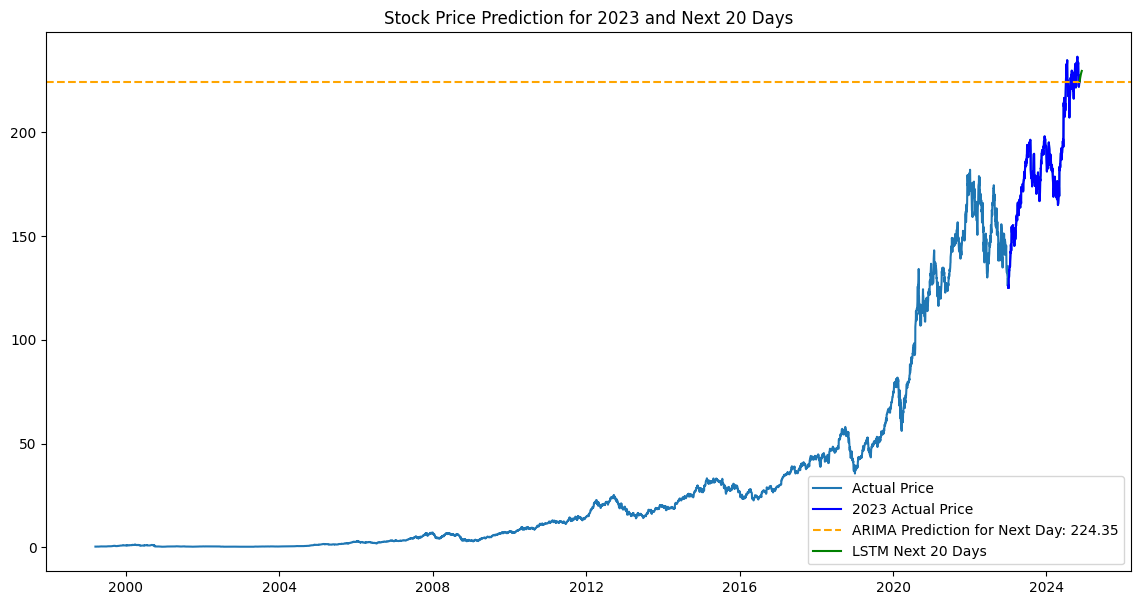

In [55]:
# Plot with updated data
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(data['Close'], label="Actual Price")

# Focus on 2023 data
plt.plot(test_data.index, test_data['Close'], label="2023 Actual Price", color='blue')

# Plot ARIMA prediction as a single point for the next day
plt.axhline(y=next_day_arima, color='orange', linestyle='--', label=f"ARIMA Prediction for Next Day: {next_day_arima:.2f}")

# Plot LSTM predictions for the next 20 days
future_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=20)
plt.plot(future_dates, predictions, label="LSTM Next 20 Days", color='green')

plt.legend()
plt.title("Stock Price Prediction for 2023 and Next 20 Days")
plt.show()


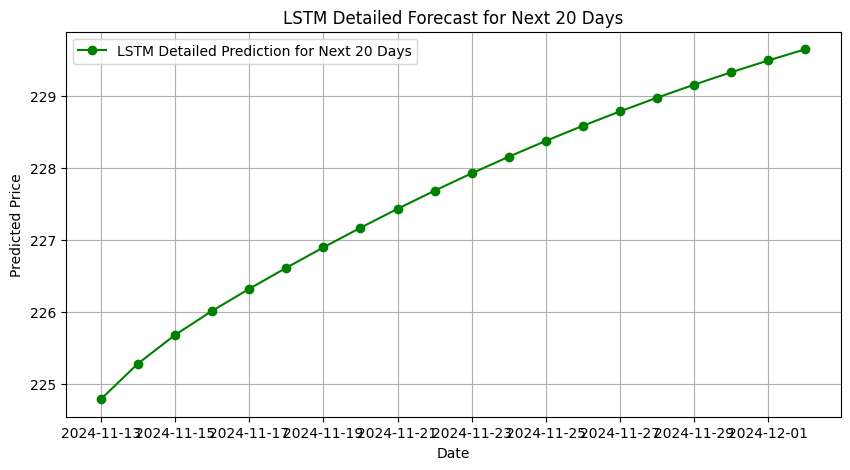

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(future_dates, predictions, marker='o', linestyle='-', color='green', label="LSTM Detailed Prediction for Next 20 Days")
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.title("LSTM Detailed Forecast for Next 20 Days")
plt.legend()
plt.grid()
plt.show()


In [57]:
print(f"ARIMA Prediction for Next Day: {next_day_arima}")
print(f"LSTM Predictions for Next 20 Days: {predictions}")


ARIMA Prediction for Next Day: 224.35091747451662
LSTM Predictions for Next 20 Days: [224.79286239 225.2877793  225.68480273 226.01881215 226.32458849
 226.61690306 226.89948742 227.17241198 227.43505717 227.6869442
 227.92803085 228.15838752 228.37823951 228.58785436 228.78757003
 228.97773855 229.15872603 229.33089859 229.49467868 229.65040423]
